In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'/content'

In [3]:
land_types = os.listdir('/content/drive/MyDrive/MLP_TUBS/UCMerced')
print (land_types)  

print("Types of lands found: ", len(land_types))

['forest', 'denseresidential', 'freeway', 'beach', 'airplane', 'buildings', 'chaparral', 'golfcourse', 'baseballdiamond', 'agricultural', 'harbor', 'storagetanks', 'parkinglot', 'runway', 'mobilehomepark', 'intersection', 'sparseresidential', 'overpass', 'river', 'mediumresidential', 'tenniscourt']
Types of lands found:  21


In [4]:
lands = []

for item in land_types:
 # Get all the file names
 all_lands = os.listdir('/content/drive/MyDrive/MLP_TUBS/UCMerced' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for land in all_lands:
    lands.append((item, str('/content/drive/MyDrive/MLP_TUBS/UCMerced' + '/' +item) + '/' + land))
    print(lands[:1])

[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]
[('forest', '/content/drive/MyDrive/MLP_TUBS/UCMerced/forest/forest01.tif')]

In [5]:
# Build a dataframe        
lands_df = pd.DataFrame(data=lands, columns=['land type', 'image'])
print(lands_df.head())
print(lands_df.tail())

  land type                                              image
0    forest  /content/drive/MyDrive/MLP_TUBS/UCMerced/fores...
1    forest  /content/drive/MyDrive/MLP_TUBS/UCMerced/fores...
2    forest  /content/drive/MyDrive/MLP_TUBS/UCMerced/fores...
3    forest  /content/drive/MyDrive/MLP_TUBS/UCMerced/fores...
4    forest  /content/drive/MyDrive/MLP_TUBS/UCMerced/fores...
        land type                                              image
2095  tenniscourt  /content/drive/MyDrive/MLP_TUBS/UCMerced/tenni...
2096  tenniscourt  /content/drive/MyDrive/MLP_TUBS/UCMerced/tenni...
2097  tenniscourt  /content/drive/MyDrive/MLP_TUBS/UCMerced/tenni...
2098  tenniscourt  /content/drive/MyDrive/MLP_TUBS/UCMerced/tenni...
2099  tenniscourt  /content/drive/MyDrive/MLP_TUBS/UCMerced/tenni...


In [6]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(lands_df))

Total number of rooms in the dataset:  2100


In [7]:
land_count = lands_df['land type'].value_counts()

print("lands in each category: ")
print(land_count)

lands in each category: 
baseballdiamond      100
airplane             100
runway               100
sparseresidential    100
mediumresidential    100
mobilehomepark       100
intersection         100
chaparral            100
buildings            100
harbor               100
tenniscourt          100
parkinglot           100
agricultural         100
denseresidential     100
beach                100
river                100
overpass             100
storagetanks         100
forest               100
freeway              100
golfcourse           100
Name: land type, dtype: int64


In [8]:
import cv2
path = '/content/drive/MyDrive/MLP_TUBS/UCMerced/'


#im_size = 100
im_size = 256

images = []
labels = []

for i in land_types:
    data_path = path + str(i) 
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [9]:
# Transform the image array to a numpy type

images = np.array(images)

images.shape

(2100, 256, 256, 3)

In [10]:
images = images.astype('float32') / 255.0
images.shape

(2100, 256, 256, 3)

In [16]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


y=lands_df['land type'].values
print(y[:5])

['forest' 'forest' 'forest' 'forest' 'forest']


In [12]:
# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)

[ 7  7  7 ... 20 20 20]


In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.20, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1680, 256, 256, 3)
(1680,)
(420, 256, 256, 3)
(420,)


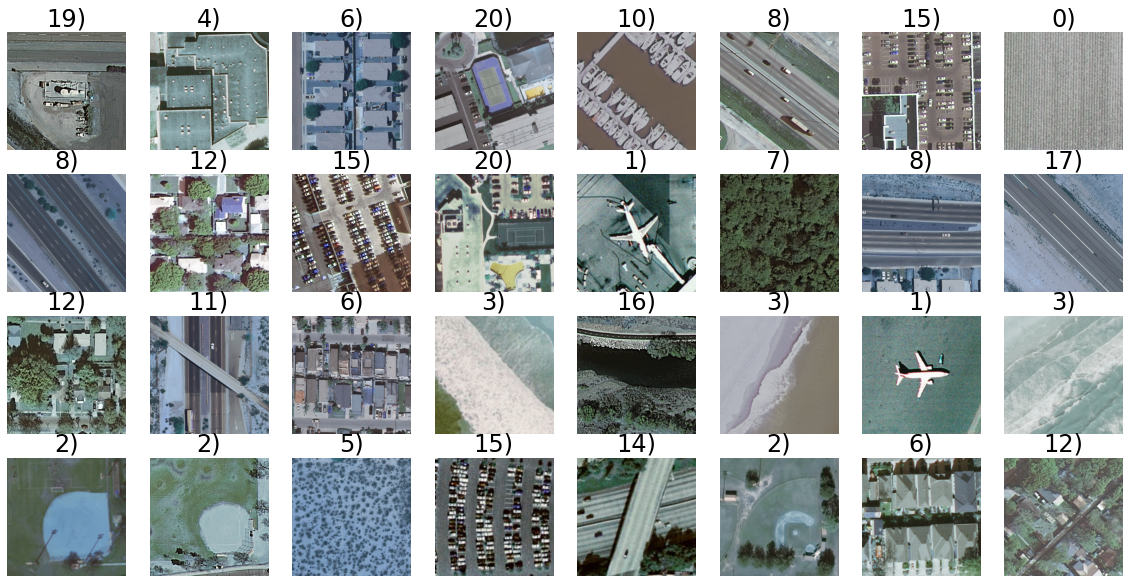

In [17]:
#Visualize the images
plt.figure(figsize=(20, 10))
cols, rows = 8,4
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(train_x[i])
    plt.title(str(train_y[i])+')',size=24)
    plt.axis('off')

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Develop a sequential model using tensorflow keras
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256,256,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(21, activation=tf.nn.softmax)
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               50331904  
_________________________________________________________________
dense_1 (Dense)              (None, 21)                5397      
Total params: 50,337,301
Trainable params: 50,337,301
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compute the model parameters
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# fit the keras model on the dataset
# Train the model  with 10 epochs 
model.fit(train_x,train_y, epochs=10)

Epoch 1/10
53/53 [==============================] - 15s 262ms/step - loss: 6.0493 - accuracy: 0.0364
Epoch 2/10
53/53 [==============================] - 14s 260ms/step - loss: 3.0998 - accuracy: 0.0423
Epoch 3/10
53/53 [==============================] - 14s 259ms/step - loss: 3.0910 - accuracy: 0.0434
Epoch 4/10
53/53 [==============================] - 14s 260ms/step - loss: 3.0920 - accuracy: 0.0409
Epoch 5/10
53/53 [==============================] - 14s 259ms/step - loss: 3.0907 - accuracy: 0.0431
Epoch 6/10
53/53 [==============================] - 14s 258ms/step - loss: 3.1011 - accuracy: 0.0471
Epoch 7/10
53/53 [==============================] - 14s 261ms/step - loss: 3.0911 - accuracy: 0.0422
Epoch 8/10
53/53 [==============================] - 14s 258ms/step - loss: 3.0886 - accuracy: 0.0499
Epoch 9/10
53/53 [==============================] - 14s 258ms/step - loss: 3.0860 - accuracy: 0.0446
Epoch 10/10
53/53 [==============================] - 14s 257ms/step - loss: 3.0985 - accura

In [23]:
y_pred = model.predict_classes(test_x)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

confusion_matrix(test_y,y_pred)

array([[ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,

In [31]:
# Evaluate the model before any training on training
test_results = model.evaluate(test_x, test_y, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

14/14 [==============================] - 1s 74ms/step - loss: 3.1375 - accuracy: 0.0381
Test results - Loss: 3.137526512145996 - Accuracy: 0.03809523954987526%


In [32]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        18
           7       0.04      1.00      0.07        16
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        22
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
pip install visualkeras

In [34]:
# Display network architecture
import visualkeras
visualkeras.layered_view(model)

In [67]:
#tuning parameters
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256,256,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(21, activation=tf.nn.softmax)])
	return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_x,train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

AttributeError: ignored

# Task 2: resize the images with the factor of 4 (images'size = 64) and #check its effect on the results. Please write your finding clearly in a text cell

In [35]:
import cv2
path = '/content/drive/MyDrive/MLP_TUBS/UCMerced/'


#im_size = 100
im_size = 64

images1 = []
labels1 = []

for i in land_types:
    data_path = path + str(i) 
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images1.append(img)
        labels1.append(i)

In [36]:
# Transform the image array to a numpy type

images1 = np.array(images1)

images1.shape

(2100, 64, 64, 3)

In [37]:
images1 = images1.astype('float32') / 255.0
images1.shape

(2100, 64, 64, 3)

In [38]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


y1=lands_df['land type'].values
print(y1[:5])

['forest' 'forest' 'forest' 'forest' 'forest']


In [39]:
# for y
y1_labelencoder = LabelEncoder ()
y1 = y1_labelencoder.fit_transform (y1)
print (y1)

[ 7  7  7 ... 20 20 20]


In [40]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images1, y1 = shuffle(images1, y1, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(images1, y1, test_size=0.20, random_state=415)

#inpect the shape of the training and testing.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1680, 64, 64, 3)
(1680,)
(420, 64, 64, 3)
(420,)


In [41]:
# Develop a sequential model using tensorflow keras
import keras
import tensorflow as tf
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(21, activation=tf.nn.softmax)
])

In [42]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dense_3 (Dense)              (None, 21)                5397      
Total params: 3,151,381
Trainable params: 3,151,381
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compute the model parameters
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# fit the keras model on the dataset
# Train the model  with 5 epochs 
model1.fit(x_train,y_train, epochs=10)

Epoch 1/10
53/53 [==============================] - 1s 20ms/step - loss: 4.6779 - accuracy: 0.0404
Epoch 2/10
53/53 [==============================] - 1s 20ms/step - loss: 3.1241 - accuracy: 0.0470
Epoch 3/10
53/53 [==============================] - 1s 20ms/step - loss: 3.0989 - accuracy: 0.0495
Epoch 4/10
53/53 [==============================] - 1s 20ms/step - loss: 3.0793 - accuracy: 0.0553
Epoch 5/10
53/53 [==============================] - 1s 20ms/step - loss: 3.0878 - accuracy: 0.0394
Epoch 6/10
53/53 [==============================] - 1s 20ms/step - loss: 3.1052 - accuracy: 0.0511
Epoch 7/10
53/53 [==============================] - 1s 20ms/step - loss: 3.0862 - accuracy: 0.0441
Epoch 8/10
53/53 [==============================] - 1s 19ms/step - loss: 3.1052 - accuracy: 0.0433
Epoch 9/10
53/53 [==============================] - 1s 20ms/step - loss: 3.0993 - accuracy: 0.0386
Epoch 10/10
53/53 [==============================] - 1s 20ms/step - loss: 3.0954 - accuracy: 0.0420


In [45]:
y_pred1 = model1.predict_classes(x_test)
y_pred1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 26,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23,
         0,  0,  0,

In [47]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        24
          15       0.04      1.00      0.08        17
          16       0.00      0.00      0.00        22
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
# Evaluate the model before any training on training
test_results1 = model1.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results1[0]} - Accuracy: {test_results1[1]}%')

14/14 [==============================] - 0s 6ms/step - loss: 3.1171 - accuracy: 0.0405
Test results - Loss: 3.117115020751953 - Accuracy: 0.04047619178891182%


Fig size is reduced from 256 to 64.
Running time is reduced due to shrinking of the figure size
and also, Accuracy is around same or reduced in MLP model. For that,neural network architectures have to be developed to improve the accuracy 

# Task 3:What are your suggestions for improving the results.You do not have to implement it. But if you do, would be perfect.

In [52]:
# Download
!wget --quiet http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
!unzip -qq UCMerced_LandUse.zip

In [53]:
!pip install -q split-folders
import splitfolders

# Split the dataset into 80% training, 10% validation and 10% testing
splitfolders.ratio('UCMerced_LandUse/Images',
                   output='dataset',
                   seed=1337,
                   ratio=(0.8, 0.2))

Copying files: 2100 files [00:01, 1536.16 files/s]


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0 / 255)
train = datagen.flow_from_directory('dataset/train', batch_size=64, seed=123)
test = datagen.flow_from_directory('dataset/val', seed=123)

Found 1680 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


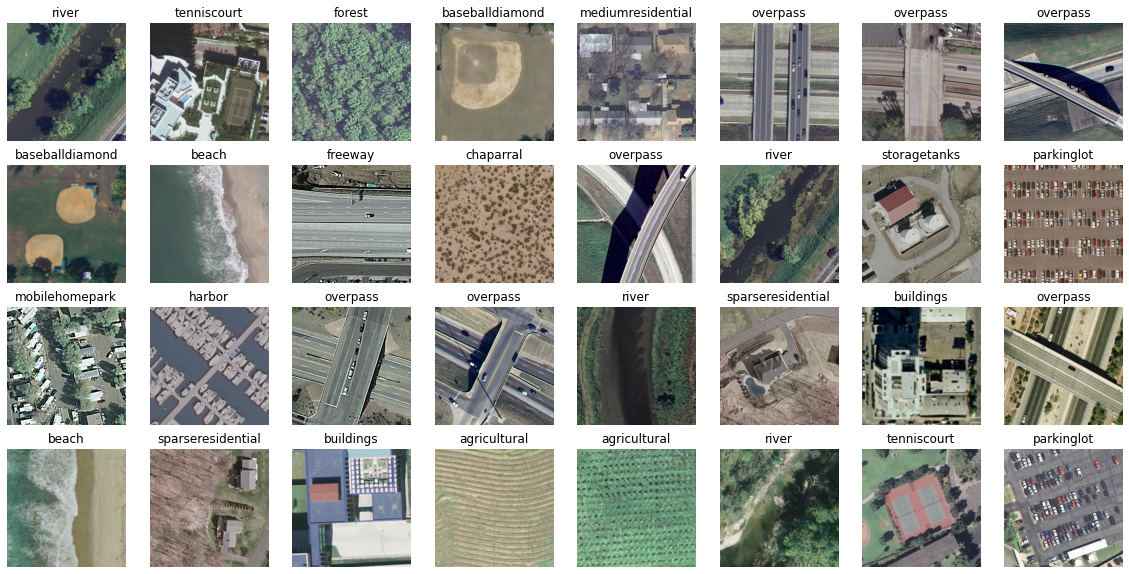

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Get the images from a batch
imgs = train.next()
labels = list(train.class_indices.keys())

# Plot
plt.figure(figsize=(20, 10))
cols, rows = 8, 4
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[0][i])
    plt.title(labels[np.argmax(imgs[1][i])])
    plt.axis('off')

In [56]:
#Resnet50
# Importing the modules and model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Building the model
net = MobileNet(include_top=False, input_shape=(256, 256, 3))
model = Flatten()(net.output)
model = Dense(units=21, activation='softmax')(model)
model = Model(inputs=net.input, outputs=model)



In [59]:
# Training the model
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='categorical_crossentropy')
model.fit(x=train, validation_data=test, epochs=10)

Epoch 1/10
27/27 [==============================] - 404s 15s/step - loss: 10.9889 - accuracy: 0.4597 - val_loss: 147.4618 - val_accuracy: 0.1357
Epoch 2/10
27/27 [==============================] - 398s 15s/step - loss: 0.9325 - accuracy: 0.8692 - val_loss: 105.0430 - val_accuracy: 0.2119
Epoch 3/10
27/27 [==============================] - 397s 15s/step - loss: 0.4929 - accuracy: 0.9348 - val_loss: 64.2880 - val_accuracy: 0.2476
Epoch 4/10
27/27 [==============================] - 398s 15s/step - loss: 0.3057 - accuracy: 0.9508 - val_loss: 33.2282 - val_accuracy: 0.4095
Epoch 5/10
27/27 [==============================] - 396s 15s/step - loss: 0.1592 - accuracy: 0.9699 - val_loss: 16.1815 - val_accuracy: 0.5952
Epoch 6/10
27/27 [==============================] - 397s 15s/step - loss: 0.2478 - accuracy: 0.9656 - val_loss: 6.7811 - val_accuracy: 0.7143
Epoch 7/10
27/27 [==============================] - 397s 15s/step - loss: 0.5160 - accuracy: 0.9377 - val_loss: 8.9299 - val_accuracy: 0.642

In [60]:
# Save the Model
model.save('SceneClassification_MobileNet.keras')

In [62]:
import numpy as np

x_test, y_test = [], []

for i in range(5):
    
    images, classes = next(test)
    x_test.append(images.reshape(len(images), 256 * 256 * 3))
    y_test.append(np.argmax(classes, axis=1))

x_test = np.vstack(x_test)
y_test = np.hstack(y_test)

print(x_test.shape, y_test.shape)

(160, 196608) (160,)


0.925


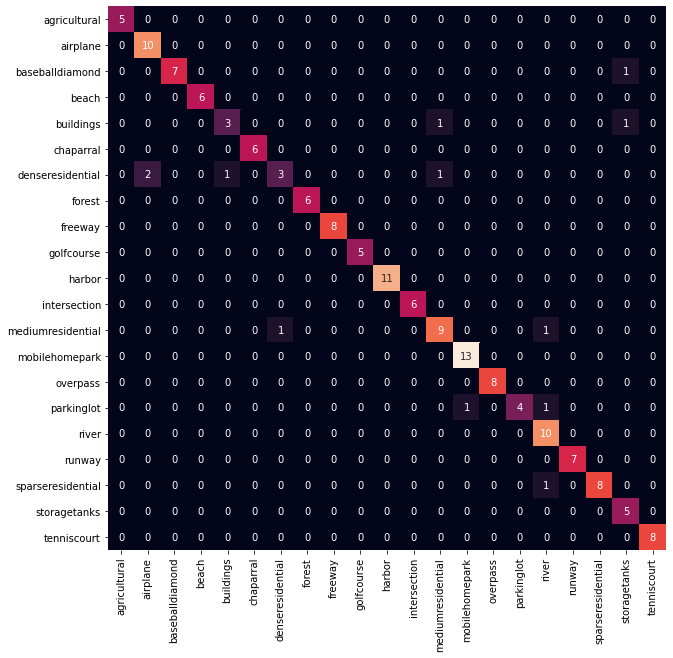

In [64]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the model and predict
mobile_net_model = load_model('SceneClassification_MobileNet.keras')
mn_pred = mobile_net_model.predict(x_test.reshape((160, 256, 256, 3)))
mn_pred = np.argmax(mn_pred, axis=1)
print(accuracy_score(y_test, mn_pred))

# Confusion matrix
cm = confusion_matrix(y_test, mn_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', xticklabels=labels,
            yticklabels=labels)
plt.show()